In [ ]:
import json
import gdown
import pandas as pd
from datetime import datetime

# YouTube Watch History

In [ ]:
file_id = "1vrUWlFnG0NKBOtt9tEuKn_uh168JH9mF"
output = "YTWHdata.json"

# Download the JSON file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1vrUWlFnG0NKBOtt9tEuKn_uh168JH9mF
To: /content/YTWHdata.json
100%|██████████| 27.8M/27.8M [00:01<00:00, 26.9MB/s]


'YTWHdata.json'

In [ ]:
YTWatchH = pd.read_json("/content/YTWHdata.json")

# Display the Unscrapped, original DataFrame
print(YTWatchH.info())
print(YTWatchH.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69700 entries, 0 to 69699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            69700 non-null  object
 1   title             69700 non-null  object
 2   titleUrl          69185 non-null  object
 3   description       16796 non-null  object
 4   time              69700 non-null  object
 5   products          69700 non-null  object
 6   details           20653 non-null  object
 7   activityControls  69700 non-null  object
 8   subtitles         48136 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB
None
    header                                              title  \
0  YouTube  Watched AWS Business Support | Amazon Web Serv...   
1  YouTube         Watched Download your Google Data [How to]   
2  YouTube  Watched Youtube Data Download Export Youtube D...   
3  YouTube  Watched Instagram Basic Display API: Getting a...   
4  YouTube  Watc

In [ ]:
titles = YTWatchH['title']
details = YTWatchH['details']
activityControls = YTWatchH['activityControls']

df = pd.DataFrame(list(zip(titles, details, activityControls)), columns=["Title", "Details", "activityControls"])

# Display the DataFrame with the titles, detials, and activityControls
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69700 entries, 0 to 69699
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             69700 non-null  object
 1   Details           20653 non-null  object
 2   activityControls  69700 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB
None
                                               Title  \
0  Watched AWS Business Support | Amazon Web Serv...   
1         Watched Download your Google Data [How to]   
2  Watched Youtube Data Download Export Youtube D...   
3  Watched Instagram Basic Display API: Getting a...   
4  Watched Protect Your Screen and Your Eyes with...   

                         Details  \
0  [{'name': 'From Google Ads'}]   
1                            NaN   
2                            NaN   
3                            NaN   
4  [{'name': 'From Google Ads'}]   

                                    activityControls  
0  [Web 

In [ ]:
import re

def is_youtube_url(text):
  """Checks if the given title text is a YouTube URL."""
  pattern = re.compile(r'(https?://)?(www\.)?(youtube|youtu|youtube-nocookie)\.(com|be)/')
  return bool(pattern.search(text))

# Apply the function to the 'titles' column and filter the DataFrame
df = df[~df['Title'].apply(is_youtube_url)]

# Drop very last record in Title becuase of an error in formmating creating an extra record by mistake
df = df.drop(df.index[-1])

print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 66778 entries, 0 to 69599
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             66778 non-null  object
 1   Details           19021 non-null  object
 2   activityControls  66778 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB
None
                                                   Title  \
0      Watched AWS Business Support | Amazon Web Serv...   
1             Watched Download your Google Data [How to]   
2      Watched Youtube Data Download Export Youtube D...   
3      Watched Instagram Basic Display API: Getting a...   
4      Watched Protect Your Screen and Your Eyes with...   
...                                                  ...   
69595  Watched RLCRAFT IS hardest game... I FINALLY S...   
69596  Watched i try beat HARDCORE MINECRAFT but chat...   
69597  Watched MY FIRST EVER IRL STREAM... AND I GET ...   
69598                 

In [ ]:
#Replace each record in the Details column if its not null with the string 'From Google Ads'
df.loc[df['Details'].notnull(), 'Details'] = 'From Google Ads'
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 66778 entries, 0 to 69599
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             66778 non-null  object
 1   Details           19021 non-null  object
 2   activityControls  66778 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB
None
                                                   Title          Details  \
0      Watched AWS Business Support | Amazon Web Serv...  From Google Ads   
1             Watched Download your Google Data [How to]              NaN   
2      Watched Youtube Data Download Export Youtube D...              NaN   
3      Watched Instagram Basic Display API: Getting a...              NaN   
4      Watched Protect Your Screen and Your Eyes with...  From Google Ads   
...                                                  ...              ...   
69595  Watched RLCRAFT IS hardest game... I FINALLY S...              NaN   
69596 

In [ ]:
def extract_activity_type(activity_controls, activity_type):
    """Checks if the given activity type is present in the activityControls list.
    Returns 1 if present, 0 otherwise.
    """
    for activity in activity_controls:
        if activity == activity_type:
            return 1
    return 0

# Create new columns based on activity types
df['YouTube Watch History'] = df['activityControls'].apply(lambda x: extract_activity_type(x, 'YouTube watch history'))
df['YouTube Search History'] = df['activityControls'].apply(lambda x: extract_activity_type(x, 'YouTube search history'))

# Drop the original 'activityControls' column if needed
df.drop(columns=['activityControls'], inplace=True)
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 66778 entries, 0 to 69599
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   Details                 19021 non-null  object
 2   YouTube Watch History   66778 non-null  int64 
 3   YouTube Search History  66778 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.5+ MB
None
                                                   Title          Details  \
0      Watched AWS Business Support | Amazon Web Serv...  From Google Ads   
1             Watched Download your Google Data [How to]              NaN   
2      Watched Youtube Data Download Export Youtube D...              NaN   
3      Watched Instagram Basic Display API: Getting a...              NaN   
4      Watched Protect Your Screen and Your Eyes with...  From Google Ads   
...                                                  ...            

In [ ]:
# Make Details Column into a Binary column and rename to "IsGoogleAd"
df['IsGoogleAd'] = df['Details'].apply(lambda x: 1 if x == 'From Google Ads' else 0)

# Drop the original 'Details' column if needed
df.drop(columns=['Details'], inplace=True)
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 66778 entries, 0 to 69599
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   YouTube Watch History   66778 non-null  int64 
 2   YouTube Search History  66778 non-null  int64 
 3   IsGoogleAd              66778 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.5+ MB
None
                                                   Title  \
0      Watched AWS Business Support | Amazon Web Serv...   
1             Watched Download your Google Data [How to]   
2      Watched Youtube Data Download Export Youtube D...   
3      Watched Instagram Basic Display API: Getting a...   
4      Watched Protect Your Screen and Your Eyes with...   
...                                                  ...   
69595  Watched RLCRAFT IS hardest game... I FINALLY S...   
69596  Watched i try beat HARDCORE MINECRAFT but c

In [ ]:
# Display the updated DataFrame
df.reset_index(drop=True, inplace=True)

print(df.info())
print('\n------------------------------------------------------------\n',df)
print('\n------------------------------------------------------------\n')
print("Number of records", len(df))
print("Number of attributes", len(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66778 entries, 0 to 66777
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   YouTube Watch History   66778 non-null  int64 
 2   YouTube Search History  66778 non-null  int64 
 3   IsGoogleAd              66778 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ MB
None

------------------------------------------------------------
                                                    Title  \
0      Watched AWS Business Support | Amazon Web Serv...   
1             Watched Download your Google Data [How to]   
2      Watched Youtube Data Download Export Youtube D...   
3      Watched Instagram Basic Display API: Getting a...   
4      Watched Protect Your Screen and Your Eyes with...   
...                                                  ...   
66773  Watched RLCRAFT IS hardest game... 

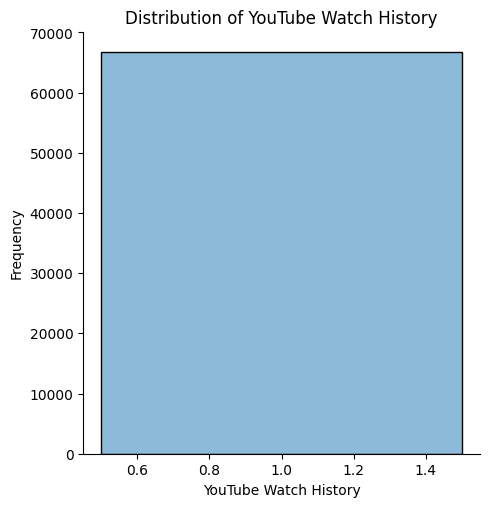

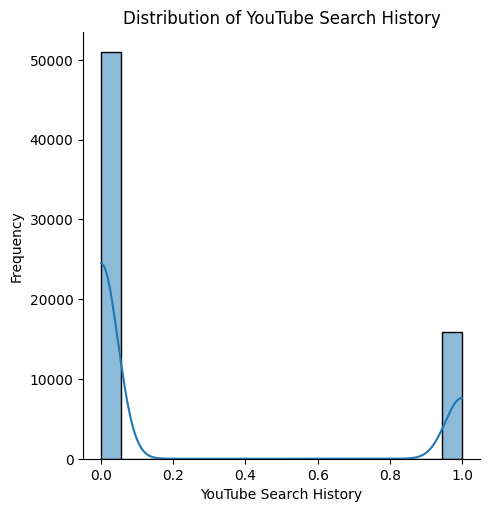

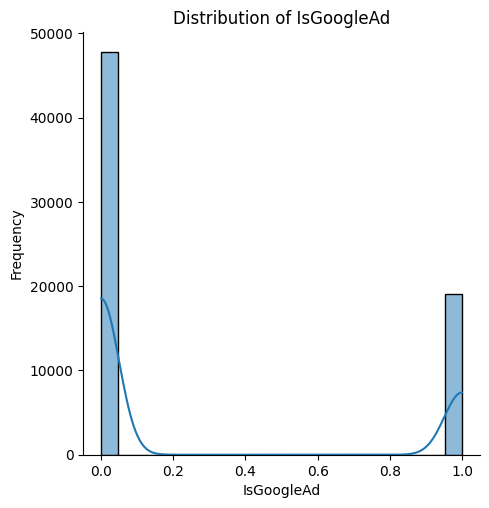

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        # Create a distribution plot using seaborn
        sns.displot(df[column], kde=True)  # kde=True adds a kernel density estimate curve
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  # Display the plot

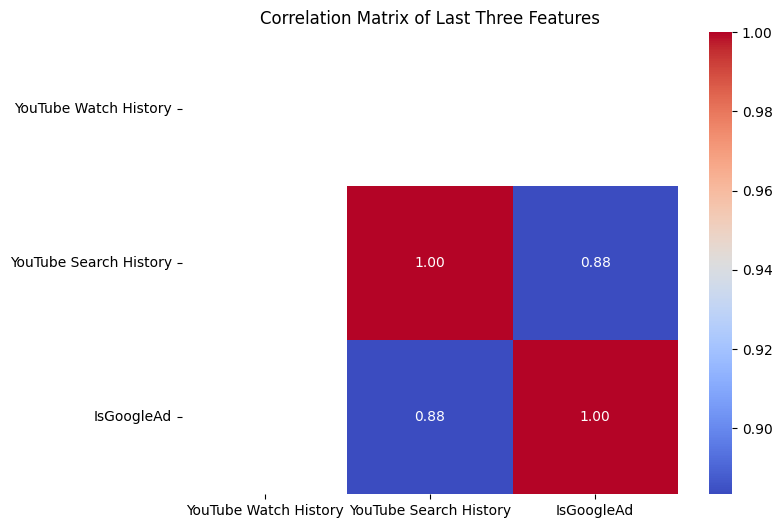

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the last three features
selected_features = df.columns[1:]

# Calculate the correlation matrix for selected features
correlation_matrix = df[selected_features].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Last Three Features')
plt.show()